In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame
market_data_df = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
market_data_df.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
monero,0.42961,15.78515,18.41097,38.95974,41.72500,169.52147,141.04116
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
wrapped-bitcoin,1.10231,7.40537,6.55668,7.37557,-3.58772,83.90520,37.53424
eos,0.14477,-1.31177,1.13751,-4.63398,-30.16898,18.06111,-17.56753
ontology,-1.35845,-1.21399,-10.56222,-34.70548,-32.70004,54.76717,-12.65493
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
usd-coin,-0.17825,-0.11871,-0.00568,-0.16584,0.04271,-0.15691,-0.19205
tron,0.07647,4.23886,1.40337,-12.60389,5.52545,132.88436,59.23821
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
market_data_df.hvplot.line(
    width=800,
    height=400,
    rot=90,
    title='Market Data',
    ylabel='Value'
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
crypto_data_scaled = scaler.fit_transform(market_data_df)

In [6]:
# Create a DataFrame with the scaled data
crypto_scaled_df = pd.DataFrame(crypto_data_scaled, columns=market_data_df.columns)

# Copy the crypto names from the original data
ind = market_data_df.index

# Set the coinid column as index
crypto_scaled_df = crypto_scaled_df.set_index(ind)

# Display sample data
crypto_scaled_df.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
tezos,-0.151583,0.708196,0.258012,-0.602296,-0.956049,-0.449211,-0.168479
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
tron,0.130050,-0.041018,0.147155,-0.543776,0.120116,-0.241118,-0.234014
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
vechain,0.585089,-0.994231,-2.217108,-0.603898,-0.930423,0.077149,-0.117482
crypto-com-chain,0.331280,-1.614844,-1.054521,-0.729931,-0.350155,-0.022866,-0.034570
ftx-token,0.414711,0.414044,-0.047386,-0.465380,0.128185,-0.416502,-0.145469
dash,-0.296940,0.094763,0.040040,-0.358830,-0.558527,-0.535732,-0.284071


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [8]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `market_data_scaled_df`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    # Create KMeans with current value of K
    KMeans_model = KMeans(k, n_init=10)
    # Fit the model
    KMeans_model.fit(crypto_scaled_df)
    # Append inertia value to inertia list
    inertia_values.append(KMeans_model.inertia_)
    
# Print inertia values
print(inertia_values)

[287.0, 195.82021818036043, 123.19048183836958, 79.02243535120977, 64.12799653396948, 53.05778846567061, 44.22433168937489, 37.180932127996115, 32.62143314033298, 28.865413150166514, 23.869001574756716]


In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_df = {'k': k_values,'inertia': inertia_values, }

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_df)

elbow_df

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,64.127997
5,6,53.057788
6,7,44.224332
7,8,37.180932
8,9,32.621433
9,10,28.865413


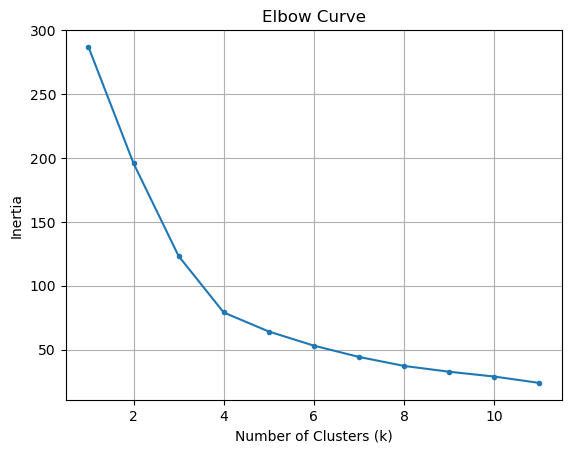

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = elbow_df.plot(x='k', y='inertia',title='Elbow Curve', ylabel='Inertia', xlabel='Number of Clusters (k)', grid = True,style='.-',legend=False)
elbow_plot;

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Four

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0, n_init=10)

In [12]:
# Fit the K-Means model using the scaled data
model.fit(crypto_scaled_df)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predictions = model.predict(crypto_scaled_df)

# Print the resulting array of cluster values.
print(predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [14]:
# Create a copy of the DataFrame
crypto_pred_df = market_data_df.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
crypto_pred_df['cluster'] = predictions

# Display sample data
crypto_pred_df.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
usd-coin,-0.17825,-0.11871,-0.00568,-0.16584,0.04271,-0.15691,-0.19205,0
cdai,0.21169,0.05820,0.17076,-2.18147,0.65726,-0.39210,-0.28783,0
dash,-1.06006,5.09387,0.51708,-7.79140,-26.22460,6.23435,-2.45897,0
monero,0.42961,15.78515,18.41097,38.95974,41.72500,169.52147,141.04116,2
okb,-2.72700,-4.55389,-5.02662,-10.43847,-2.83120,39.95853,141.95791,0
stellar,-1.00843,2.07149,-1.08217,-8.12933,-30.80369,84.62157,13.80715,0
vechain,1.28766,-1.76352,-18.15890,-14.16831,-43.62359,269.70264,202.86827,0


In [16]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
crypto_pred_df.hvplot(x='price_change_percentage_24h', y='price_change_percentage_7d', kind='scatter', by='cluster', hover_cols=['coin_id'], title='Crypto Scatter Plot', ylabel='Price Change Percentage (7d)', xlabel ='Price Change Percentage (24h)')

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
crypto_pca = pca_model.fit_transform(crypto_scaled_df)
# View the first five rows of the DataFrame. 
crypto_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [19]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.

variance_ratio = pca_model.explained_variance_ratio_

print(variance_ratio)

total = variance_ratio[0]+variance_ratio[1]+variance_ratio[2]
print(f'Total: {round(total, 4)}%')

[0.3719856  0.34700813 0.17603793]
Total: 0.895%


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 
89.5%

In [20]:
# Create a new DataFrame with the PCA data.
crypto_pca_df = pd.DataFrame(data=crypto_pca, index=crypto_pred_df.index, columns=['PC1', 'PC2', 'PC3'])

# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
# Set the coinid column as index
# Display sample data
crypto_pca_df.sample(10)

,PC1,PC2,PC3
coin_id,,,
nem,0.608974,0.563532,-1.148742
havven,0.865762,-2.261882,0.275583
stellar,-0.489015,-0.732719,-0.062543
maker,-0.389045,0.165041,0.379414
usd-coin,-0.438408,-0.175337,-0.663388
ethereum,-0.458261,0.458466,0.952877
tron,-0.393352,-0.108192,-0.012756
neo,-0.362120,-0.986914,-0.728752
ripple,-0.471835,-0.222660,-0.479053


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11
k_pca = list(range(1, 12))

In [22]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `market_data_df_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_pca:
    k_model = KMeans(n_clusters=k, n_init=10)
    k_model.fit(crypto_pca_df)
    inertia_pca.append(k_model.inertia_)
    
print(inertia_pca)

[256.8740855678926, 168.81189630685236, 93.77462568057298, 49.66549665179738, 38.07279215014323, 27.61897178795744, 21.134056037473613, 17.091636643864753, 13.593650379876738, 10.484890485976926, 8.057330309135954]


In [23]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k_pca': k_pca, 'inertia_pca': inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_pca_df = pd.DataFrame(elbow_data_pca)

elbow_pca_df

,k_pca,inertia_pca
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,38.072792
5,6,27.618972
6,7,21.134056
7,8,17.091637
8,9,13.593650
9,10,10.484890


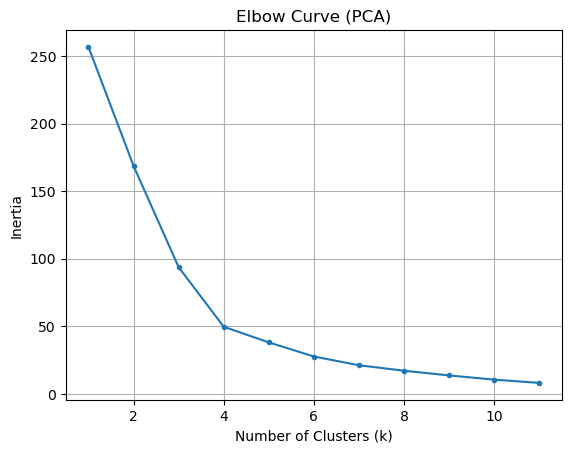

In [24]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot_pca = elbow_pca_df.plot(x='k_pca', y='inertia_pca', title='Elbow Curve (PCA)', ylabel='Inertia', xlabel='Number of Clusters (k)', grid = True,style='.-',legend=False)

elbow_plot_pca;

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Four


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init=10,random_state=0)

In [26]:
# Fit the K-Means model using the PCA data
model.fit(crypto_pca_df)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predictions = model.predict(crypto_pca_df)
# Print the resulting array of cluster values.
print(predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [28]:
# Create a copy of the DataFrame with the PCA data
crypto_pca_df_copy = crypto_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
crypto_pca_df_copy['cluster'] = predictions

# Display sample data
crypto_pca_df_copy.sample(10)

,PC1,PC2,PC3,cluster
coin_id,,,,
iota,-0.764665,-0.517886,0.204990,0
neo,-0.362120,-0.986914,-0.728752,0
nem,0.608974,0.563532,-1.148742,0
cdai,-0.513528,-0.142802,-0.656566,0
stellar,-0.489015,-0.732719,-0.062543,0
litecoin,-0.649468,0.432165,0.600303,2
bitcoin,-0.600667,0.842760,0.461595,2
eos,-0.693425,-0.473815,-0.527597,0
cosmos,-0.306272,0.703415,1.714224,2


In [29]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
crypto_pca_df_copy.hvplot(x='PC1', y='PC2', kind='scatter', by='cluster', hover_cols=['coin_id'],title='Crypto PCA Scatter Plot', ylabel='PCA2', xlabel ='PCA1')

:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

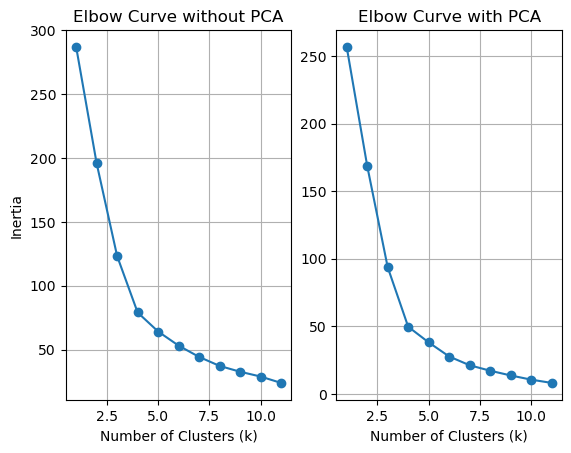

In [30]:
# Composite plot to contrast the Elbow curves
# Plot Elbow Curve with PCA
plt.subplot(1, 2, 2)
plt.plot(elbow_pca_df['k_pca'], elbow_pca_df['inertia_pca'], marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve with PCA')
plt.grid(True)

# Plot Elbow Curve without PCA
plt.subplot(1, 2, 1)
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve without PCA')
plt.grid(True)

In [31]:
# Composite plot to contrast the clusters
market_cols = ['cluster', 'price_change_percentage_24h', 'price_change_percentage_7d']
pca_cols = ['cluster']

# join for simplicity
df = crypto_pred_df[market_cols].join(crypto_pca_df_copy[pca_cols], lsuffix='-no-pca', rsuffix='-pca')

# plot
ax1 = df.hvplot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', by='cluster-no-pca', marker='o', width=500, height=250)
ax2 = df.hvplot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', by='cluster-pca', marker='+', width=500, height=250)
ax1 + ax2

:Layout
   .NdOverlay.I  :NdOverlay   [cluster-no-pca]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .NdOverlay.II :NdOverlay   [cluster-pca]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Utilizing PCA for feature reduction likely enhanced clustering by emphasizing crucial patterns, reducing noise, and enhancing the clusters. This, in turn, may result in more insightful conclusions which will allow more informed decisions.